# Binary classification using yeast

## Data import and exploration

We'll be using the yeast dataset that is made publicly available by [openml.org](https://www.openml.org). You can read all about this set [here](https://www.openml.org/search?type=data&sort=runs&id=40597&status=active).

But let's explore it ourselves. First, import. We could import using the import from the openml-python package, but sklearn provides an easier way. We'll import it that way and explore the size of what we have imported.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
import pandas as pd

X, Y = fetch_openml("yeast", version=4, return_X_y=True)

print(X.shape) 
print(Y.shape) 

(2417, 103)
(2417, 14)


We have 2417 rows. In X, the data, we have 103 attributes and in Y, what we should be predicting we see 14 classes. On the [description-page](https://www.openml.org/search?type=data&sort=runs&id=40597&status=active) of this data we read that only 13 of those are actually used because of label-sparsity (very few examples are available).

Funniest thing: X and Y are pandas dataframes without us losing any effort over that. Good!

Look at Y to see what we are predicting.

In [2]:
#DELETE

Y

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
1,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
3,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2413,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
2414,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
2415,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE


Check the datatypes of the attributes (in X). Only show the different types.

In [3]:
#DELETE
X.dtypes.unique()


array([dtype('float64')], dtype=object)

Ok, so this learns us we are strictly working with numbers. Maybe check some graphs on some of the number? Boxplots for example!

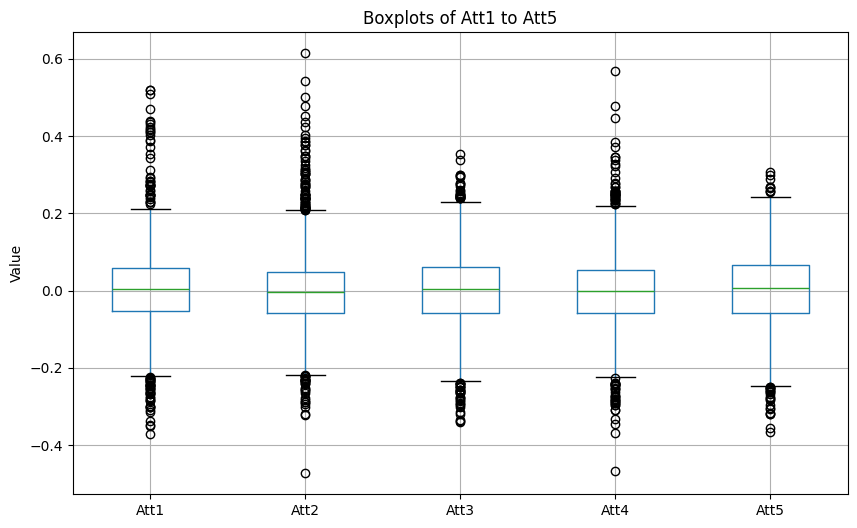

In [15]:
# Assuming df is your DataFrame
X.boxplot(column=list(X.columns[:5]), figsize=(10, 6))
plt.title("Boxplots of Att1 to Att5")
plt.ylabel("Value")  # Optional: customize based on your data
plt.show()


All seems pretty normal. Some outliers; but we'll leave it at that. Every row can lead to multiple labels (in Y). Show for every column in Y how many rows have that label. Unfortunately they're not stored as a boolean but as a string value.

In [ ]:
#DELETE

Y.apply(lambda col: (col == "TRUE").sum())

Class1      762
Class2     1038
Class3      983
Class4      862
Class5      722
Class6      597
Class7      428
Class8      480
Class9      178
Class10     253
Class11     289
Class12    1816
Class13    1799
Class14      34
dtype: int64

Knowing that we have about 2400 rows, Class2 seems pretty close to the middle. Let's predict that!

## Binary classifier

Let's build a binary classifier for Class 2. We'll be using a random forest classifier. (Or you can use another model if you'd like...)

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# X = X
y = Y["Class2"]

Now split the dataset in a training and a test-set. Use random state of [42](https://en.wikipedia.org/wiki/42_(number)). Use 20% of the data as test-set.

In [20]:
# DELETE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Next create the model and train it ons the data. Use 100 estimators and the same random state.

In [ ]:
# DELETE

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate the model by predicting it on the test-set. Also create a confusion matrix and calculate all the scores.

In [ ]:
# DELETE

y_pred = rf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[227  46]
 [112  99]]

Classification Report:
               precision    recall  f1-score   support

       FALSE       0.67      0.83      0.74       273
        TRUE       0.68      0.47      0.56       211

    accuracy                           0.67       484
   macro avg       0.68      0.65      0.65       484
weighted avg       0.68      0.67      0.66       484



Precision and recall are about .67 and .83, which isn't great. Note how we can not draw an ROC curve because we simply predicted a label. Luckily there is a way to get the probabilities from random forest by using "rf.predict_proba(X_test)[:, 1]". Try it and display the first 10 probabilities.

In [25]:
# DELETE

y_proba = rf.predict_proba(X_test)[:, 1]
y_proba[:10]  # Display first 10 probabilities

array([0.47, 0.47, 0.49, 0.24, 0.44, 0.63, 0.44, 0.39, 0.41, 0.46])

Now draw the ROC curve.

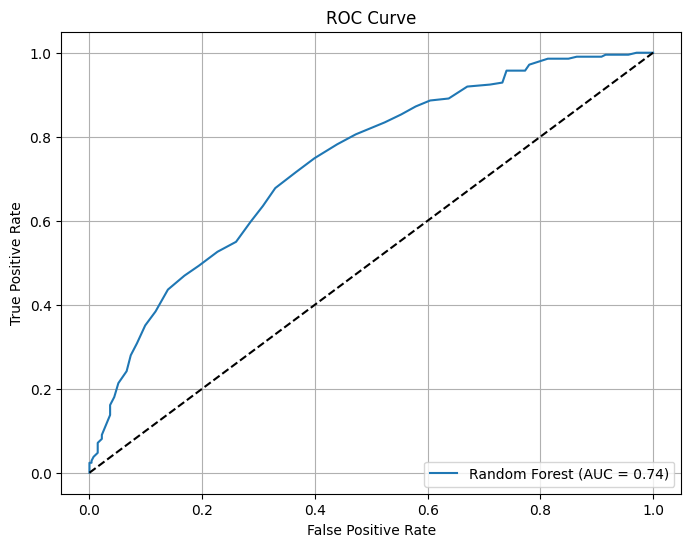

In [27]:
#DELETE
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label="TRUE")

# Compute AUC (Area Under Curve)
auc_score = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Now you can see how bad the model is.

## Bigger forest

Using the same train/test split, retrain your model with 500 estimators. Draw the ROC-curves again.


Confusion Matrix:
 [[232  41]
 [109 102]]


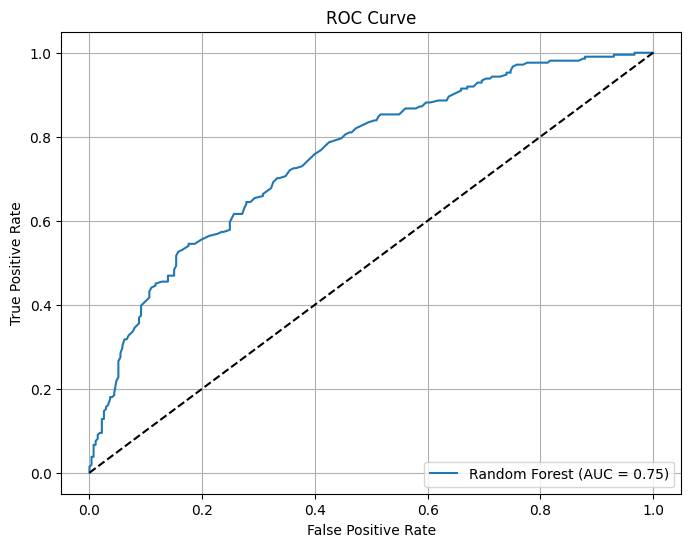

In [30]:
# DELETE

rf_2 = RandomForestClassifier(n_estimators=500, random_state=42)
rf_2.fit(X_train, y_train)

y_2_pred = rf_2.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_2_pred))

y_2_proba = rf_2.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_2_proba, pos_label="TRUE")

# Compute AUC (Area Under Curve)
auc_score = roc_auc_score(y_test, y_2_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



More bubbly but not better. You did notice it took longer, no? Try another model next!

## XGBoost

Now use XGBoost. Use the same train/test-split.

One problem though: XGBoost works best with "1" and "0", not with "TRUE" and "FALSE". Create "y_train_new" and "y_test_new" based on the existing ones, but with the correct data.


In [34]:
#DELETE

y_train_new = y_train.map({"TRUE": 1, "FALSE": 0})
y_test_new = y_test.map({"TRUE": 1, "FALSE": 0})
y_train_new.head()

1681    1
1565    1
544     1
1517    0
821     1
Name: Class2, dtype: category
Categories (2, int64): [0, 1]

Now you're ready to train XGboost. (You have to install it first.) 

In [ ]:
# !pip install xgboost

c:\Scripts\Cello_AI\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:08:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
 [[203  70]
 [ 97 114]]


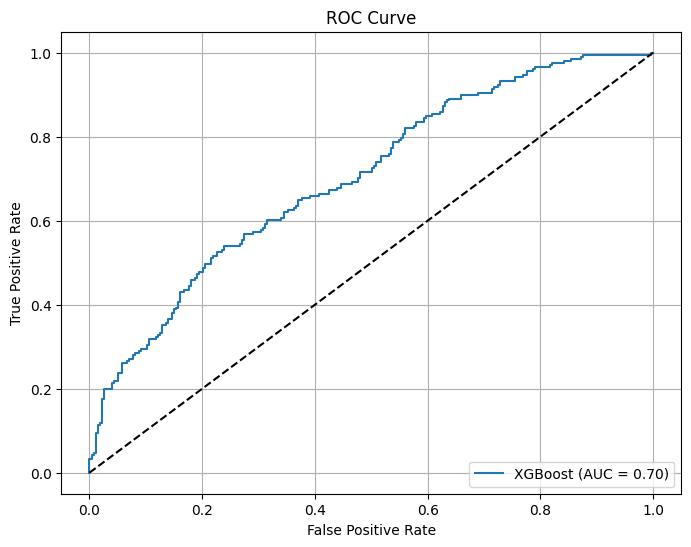

In [35]:
import xgboost as xgb

model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train_new)

y_3_pred = model.predict(X_test)
y_3_proba = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test_new, y_3_pred))

# print("Classification Report:\n", classification_report(y_test_new, y_3_pred))
# print("AUC Score:", roc_auc_score(y_test_new, y_3_proba))

fpr, tpr, _ = roc_curve(y_test_new, y_3_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test_new, y_3_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


This model is even worse than random forest! That is because when using XGboost hyperparameter tuning is essential. We're now looking at all 103 input parameters equally, which isn't a good idea. Check out "rf.feature_importances_" and "model.get_booster().get_score()" to see which are the more interesting features.

Start with "rf.feature_importances_".

In [ ]:
# DELETE
rf.feature_importances_  # Display top 10 feature importances

array([0.00968284, 0.00898102, 0.00910989, 0.01064108, 0.00908008,
       0.00968204, 0.01000974, 0.01025308, 0.01385876, 0.00800862,
       0.00835933, 0.00882813, 0.00844992, 0.00744615, 0.00759057,
       0.00814596, 0.00926414, 0.01077978, 0.01011642, 0.01160589,
       0.0085833 , 0.00912146, 0.00782756, 0.00949296, 0.00904106,
       0.00785705, 0.00720388, 0.00837094, 0.00866705, 0.00928942,
       0.01109147, 0.00845305, 0.00892229, 0.00916813, 0.01069037,
       0.00956387, 0.00838304, 0.00892136, 0.00756273, 0.00841063,
       0.0090719 , 0.0090509 , 0.01051235, 0.00944546, 0.00813663,
       0.00948693, 0.01023348, 0.00827913, 0.0087423 , 0.00950377,
       0.00993199, 0.00893306, 0.01074506, 0.01028915, 0.00831178,
       0.00826046, 0.01268374, 0.0080126 , 0.00821201, 0.00981058,
       0.01944821, 0.01624411, 0.01309463, 0.00693183, 0.01169902,
       0.01684373, 0.00887313, 0.01240964, 0.01058289, 0.00942145,
       0.00915951, 0.00924196, 0.00803805, 0.00897102, 0.00821

You'll see a list of numbers, one for every column. The numbers add up to 1, and bigger numbers mean the feature is more important (in more of the decision trees, but that's diving a bit deep before we looked into what a random forest does).

What does "model.get_booster().get_score()" tell you?

You can use a modifier in the last bracket, choosing the importance_type. The options are:

* 'weight' (default): number of times a feature is used to split across all trees.
* 'gain': average gain in accuracy brought by the feature when it is used in a split.
* 'cover': average number of samples affected by the splits using that feature.
* 'total_gain': total gain (sum across all splits).
* 'total_cover': total cover (sum across all splits).

In [41]:
#DELETE
model.get_booster().get_score(importance_type='gain')

{'Att1': 1.2636805772781372,
 'Att2': 1.5956144332885742,
 'Att3': 1.2659056186676025,
 'Att4': 1.9680132865905762,
 'Att5': 1.7645806074142456,
 'Att6': 1.3297687768936157,
 'Att7': 2.019221782684326,
 'Att8': 1.4189633131027222,
 'Att9': 2.7233002185821533,
 'Att10': 1.7990961074829102,
 'Att11': 1.8451991081237793,
 'Att12': 1.5211879014968872,
 'Att13': 1.6770309209823608,
 'Att14': 2.3240113258361816,
 'Att15': 1.7923542261123657,
 'Att16': 0.9180374145507812,
 'Att17': 1.4754090309143066,
 'Att18': 2.459254503250122,
 'Att19': 2.5825412273406982,
 'Att20': 2.1407840251922607,
 'Att21': 1.0924795866012573,
 'Att22': 1.3898897171020508,
 'Att23': 1.7733948230743408,
 'Att24': 1.3757777214050293,
 'Att25': 1.2826591730117798,
 'Att26': 1.4305380582809448,
 'Att27': 0.9996392726898193,
 'Att28': 1.3245890140533447,
 'Att29': 0.9502326846122742,
 'Att30': 1.6997660398483276,
 'Att31': 2.2127058506011963,
 'Att32': 2.041186809539795,
 'Att33': 1.4325467348098755,
 'Att34': 2.0855221748

## Summary

We'll stop here, as we've already ventured to far. Why? Because we're tuning a model using only a two-set split. That is not allowed, we should have used a three set split (more on that in the next chapter).

But what have we learned? We've used a couple of models on a large dataset and noticed that results aren't always great from the start. We've also used the results of our model to calculate all the score we went over in the powerpoint.

We still didn't start doing data augmentation or parameter tuning. But we'll get there!